Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston House Price Dataset

In [2]:
data_url = "housing.csv"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
house_price_dataset = pd.DataFrame(data)
house_price_dataset['target']=target
print(house_price_dataset)

           0    1      2    3      4      5     6       7    8      9    10  \
0    1.23247  0.0   8.14  0.0  0.538  6.142  91.7  3.9769  4.0  307.0  21.0   
1    0.75026  0.0   8.14  0.0  0.538  5.924  94.1  4.3996  4.0  307.0  21.0   
2    0.67191  0.0   8.14  0.0  0.538  5.813  90.3  4.6820  4.0  307.0  21.0   
3    0.77299  0.0   8.14  0.0  0.538  6.495  94.4  4.4547  4.0  307.0  21.0   
4    1.13081  0.0   8.14  0.0  0.538  5.713  94.1  4.2330  4.0  307.0  21.0   
..       ...  ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
237  0.28960  0.0   9.69  0.0  0.585  5.390  72.9  2.7986  6.0  391.0  19.2   
238  0.23912  0.0   9.69  0.0  0.585  6.019  65.3  2.4091  6.0  391.0  19.2   
239  0.22438  0.0   9.69  0.0  0.585  6.027  79.7  2.4982  6.0  391.0  19.2   
240  0.04527  0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0  21.0   
241  0.10959  0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0  21.0   

         11     12    13       14   15  target  
0 

In [4]:
house_price_dataframe = house_price_dataset

print(house_price_dataframe.columns)
print("Number of existing columns:", len(house_price_dataframe.columns))

house_price_dataframe.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'target', 'col15', 'col16', 'col17'] # Added 3 more column names

print(house_price_dataframe.head())

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 'target'], dtype='object')
Number of existing columns: 17
      CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  1.23247  0.0   8.14   0.0  0.538  6.142  91.7  3.9769  4.0  307.0     21.0   
1  0.75026  0.0   8.14   0.0  0.538  5.924  94.1  4.3996  4.0  307.0     21.0   
2  0.67191  0.0   8.14   0.0  0.538  5.813  90.3  4.6820  4.0  307.0     21.0   
3  0.77299  0.0   8.14   0.0  0.538  6.495  94.4  4.4547  4.0  307.0     21.0   
4  1.13081  0.0   8.14   0.0  0.538  5.713  94.1  4.2330  4.0  307.0     21.0   

        B  LSTAT  target    col15  col16  col17  
0  396.90  18.72    15.2  0.98843    0.0   8.14  
1  394.33  16.30    15.6  0.84054    0.0   8.14  
2  376.88  14.81    16.6  0.95577    0.0   8.14  
3  387.94  12.80    18.4  1.00245    0.0   8.14  
4  360.17  22.60    12.7  1.35472    0.0   8.14  


In [5]:
house_price_dataframe['price'] = house_price_dataset.target

In [6]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,col15,col16,col17,price
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2,0.98843,0.0,8.14,15.2
1,0.75026,0.0,8.14,0.0,0.538,5.924,94.1,4.3996,4.0,307.0,21.0,394.33,16.30,15.6,0.84054,0.0,8.14,15.6
2,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81,16.6,0.95577,0.0,8.14,16.6
3,0.77299,0.0,8.14,0.0,0.538,6.495,94.4,4.4547,4.0,307.0,21.0,387.94,12.80,18.4,1.00245,0.0,8.14,18.4
4,1.13081,0.0,8.14,0.0,0.538,5.713,94.1,4.2330,4.0,307.0,21.0,360.17,22.60,12.7,1.35472,0.0,8.14,12.7


In [7]:
house_price_dataframe.shape

(242, 18)

In [8]:
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
col15      0
col16      0
col17      0
price      0
dtype: int64

In [9]:
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,col15,col16,col17,price
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,4.121613,11.809917,11.349545,0.090909,0.556305,6.270087,68.763223,3.732138,9.789256,415.206612,18.481405,352.620041,12.876983,22.445041,3.398366,11.514463,11.311074,22.445041
std,10.189159,23.959791,7.013344,0.288076,0.117629,0.729879,28.066335,2.122728,8.832760,170.481545,2.148150,95.970977,7.415410,9.387150,7.067414,23.617122,6.874084,9.387150
min,0.009060,0.000000,0.740000,0.000000,0.385000,4.138000,6.000000,1.129600,1.000000,188.000000,12.600000,0.320000,1.920000,5.000000,0.010960,0.000000,0.460000,5.000000
25%,0.082045,0.000000,5.130000,0.000000,0.448250,5.876000,45.625000,2.065625,4.000000,280.250000,17.400000,372.555000,6.950000,16.625000,0.082913,0.000000,5.190000,16.625000
50%,0.289575,0.000000,9.900000,0.000000,0.538000,6.201500,77.900000,2.939350,5.000000,350.000000,19.100000,390.615000,11.685000,21.200000,0.252775,0.000000,9.900000,21.200000
75%,3.755472,19.375000,18.100000,0.000000,0.629250,6.564250,93.575000,5.078825,24.000000,666.000000,20.200000,395.915000,17.140000,24.775000,3.991232,18.125000,18.100000,24.775000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,67.920800,100.000000,27.740000,50.000000


Understanding the correlation between various features in the dataset

1. Positive Correlation

2. Negative Correlation

In [10]:
correlation = house_price_dataframe.corr()

Splitting the data and Target

In [11]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [12]:
print(X)
print(Y)

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    1.23247  0.0   8.14   0.0  0.538  6.142  91.7  3.9769  4.0  307.0   
1    0.75026  0.0   8.14   0.0  0.538  5.924  94.1  4.3996  4.0  307.0   
2    0.67191  0.0   8.14   0.0  0.538  5.813  90.3  4.6820  4.0  307.0   
3    0.77299  0.0   8.14   0.0  0.538  6.495  94.4  4.4547  4.0  307.0   
4    1.13081  0.0   8.14   0.0  0.538  5.713  94.1  4.2330  4.0  307.0   
..       ...  ...    ...   ...    ...    ...   ...     ...  ...    ...   
237  0.28960  0.0   9.69   0.0  0.585  5.390  72.9  2.7986  6.0  391.0   
238  0.23912  0.0   9.69   0.0  0.585  6.019  65.3  2.4091  6.0  391.0   
239  0.22438  0.0   9.69   0.0  0.585  6.027  79.7  2.4982  6.0  391.0   
240  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
241  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   

     PTRATIO       B  LSTAT  target    col15  col16  col17  
0       21.0  396.90  18.72    15.2  0.98843    0.

Splitting the data into Training data and Test data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(242, 17) (193, 17) (49, 17)


Model Training

In [15]:
model = XGBRegressor()

In [16]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on training data

In [17]:
training_data_prediction = model.predict(X_train)

In [18]:
print(training_data_prediction)

[24.498547  21.700436  17.000172  13.499249  21.198452  20.000511
 28.002985  21.899883  23.30062   25.000193  13.20007   16.500408
 16.59942   12.699645  18.40239   24.798563  11.298555  21.999989
 10.8018465 24.49978   36.400723  33.199574  23.797747  33.39924
 45.999683  17.600218  34.900055  32.90051   21.198582  18.80016
 42.300224  22.900238  16.800266  27.89979   20.40092   19.50032
 24.400356  25.000395  11.700175  17.397375  16.399513  15.0999365
 39.800907  33.80088   11.0000725 19.099665  32.401012   9.59984
 16.101181  24.400227  15.598851  21.19954   14.499529  18.60039
 24.699963  19.499971  14.899692  49.999825  12.500207  28.499731
 29.098457  29.001493  29.600462  21.500038   8.400218  19.000801
 32.999657  25.000458  49.999847  20.800133  17.201254  21.700733
 29.899714  16.69967    8.799742  20.699497  10.198657  23.700554
 13.400932   8.50068   20.600695  49.997856   7.500065  10.399826
 14.59877   36.10054   20.600426  24.400309  15.598376  15.201992
 19.999598  27

In [19]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999999920801683
Mean Absolute Error :  0.000618110913686879


Visualizing the actual Prices and predicted prices

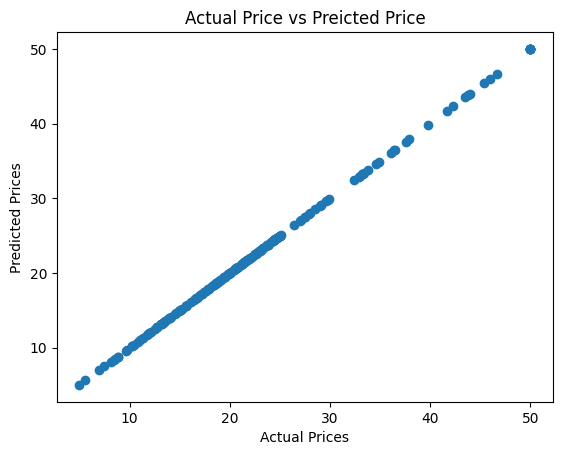

In [20]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on Test Data

In [21]:
test_data_prediction = model.predict(X_test)

In [22]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.995650582391811
Mean Absolute Error :  0.2828823790258289
